# EE 263: HW1 Notebook
**Author**: Luis Perez
**Last Updated**: June 30, 2019

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

## Problem 1: A simple power control algorithm for wireless networks
### Part (b) - Simulation of Algorithm

In [2]:
"""
The goal is to simulate the power control dynamics using our solution
in (a). We are given the following input:

         1 .2 .1
G =     .1  2 .1
        .3 .1  3
γ = 3, α = 1.2, σ = 0.1.
"""
G = np.array([
    [1, .2, .1],
    [.1, 2, .1],
    [.3, .1, 3]])

In [3]:
def getLinearSystem(G, gamma=3, alpha=1.2, sigma=0.1):
    # This broadcasts the diagonal as columns.
    diagonal = np.stack([G.diagonal(), G.diagonal(), G.diagonal()]).T
    # With the above, this gives ij / ii
    A = alpha * gamma * G / diagonal
    # And we also zero out the diagonal.
    A[np.identity(A.shape[0]) == 1] = 0

    b = alpha * gamma * sigma**2 / G.diagonal()
    return A,b

In [4]:
# We run the simulation. We compute S(t) and p(t).
def simulation_step(G, A, b, p, sigma = 0.1):
    """One step in the simulation.
    Given current power levels p, return (p(t+1), S(t))
    """
    localG = np.copy(G)
    localG[np.identity(G.shape[0]) == 1] = 0
    q = sigma**2 + np.dot(localG, p)
    s = G.diagonal() * p
    return b + np.dot(A, p), s / q

In [5]:
def simulate(numSteps = 100, gamma=3, alpha=1.2):
    """Runs the simulation for numSteps.
    
    Returns list of (p(t), S(t)) for each timestep.
    """
    A, b = getLinearSystem(G, gamma=gamma, alpha=alpha)
    results = []
    prevP = np.ones(A.shape[0])
    for _ in range(numSteps):
        newP, S = simulation_step(G, A, b, prevP)
        results.append((prevP, S))
        prevP = newP
    return results

In [6]:
# Plot the results. We plot S(i) and p(i) over t, as well as alpha y
def plot(numSteps=100, gamma=3, alpha=1.2, saveFig=True):
    results = simulate(numSteps=numSteps, gamma=gamma, alpha=alpha)
    pts, Sts = zip(*results)
    powerData = pd.DataFrame()
    powerData['p1(t)'], powerData['p2(t)'], powerData['p3(t)'] = zip(*pts)
    
    ratioData = pd.DataFrame()
    ratioData['S1(t)'], ratioData['S2(t)'], ratioData['S3(t)'] = zip(*Sts)
    ratioData['Target'] = [alpha * gamma] * len(results)
    
    powerData['Time'] = range(1, numSteps+1)
    ratioData['Time'] = range(1, numSteps+1)
    
    longPowerData = pd.melt(powerData, id_vars=['Time'],
                            var_name='Power Station')
    longRationData = pd.melt(ratioData, id_vars=['Time'],
                             var_name=['SINR'])
    
    ax = sns.lineplot(x='Time', y='value',
                      hue='Power Station', data=longPowerData)
    ax.set_title("Power Level By Station Over Time")
    ax.set_ylabel("Power Level")
    plt.show()
    if saveFig:
        ax.get_figure().savefig("power_level_steps_%s_gamma_%s.png" % (numSteps, gamma))
    
    plt.close()
    ax = sns.lineplot(x='Time', y='value',
                      hue='SINR', data=longRationData)
    ax.set_title("Signal to Interference plus Noise Ratio (SINR) Over Time")
    ax.set_ylabel("Ratio")
    plt.show()
    if saveFig:
        ax.get_figure().savefig("sinr_steps_%s_gamma_%s.png" % (numSteps, gamma))

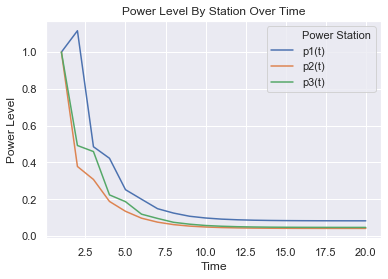

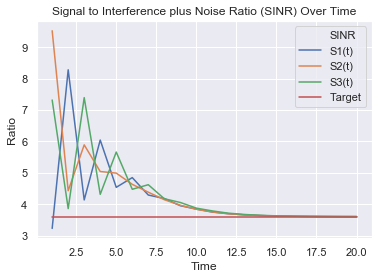

In [7]:
# Plot with gamme = 3
plot(numSteps=20, gamma=3, saveFig=False)

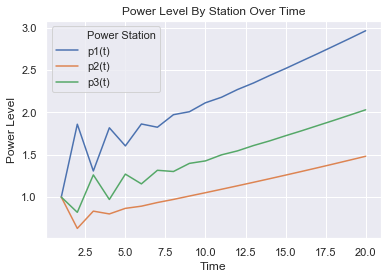

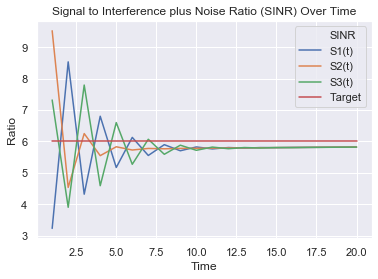

In [8]:
# Repeat with gamma = 5
plot(numSteps=20, gamma=5, saveFig=False)

## Problem 5: Counting Sequences
### Part (b) - Total number of length-10 sequences

In [9]:
"""
The language transition model. Corresponds to the following rules:
    • 1 must be followed by 2 or 3
    • 2 must be followed by 2 or 5
    • 3 must be followed by 1
    • 4 must be followed by 4 or 2 or 5
    • 5 must be followed by 1 or 3
    
Where A_{ij} means that character j can be followed by character i.
""" 

A = np.array([
    [0, 0, 1, 0, 1],
    [1, 1, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0]])

In [10]:
"""
Compute A^9 which answers the question. Each entry answers the question:
    How many valid sequences of length 10 are there whose first sequence
    character is j and last sequence characnter is i.
"""
B = np.linalg.matrix_power(A, 9)

In [11]:
"""
Actually sum all values to answer the question of how many
sequences of length 10 there are.
"""
print("There are %i valid sequences of length 10" % B.sum())

There are 1079 valid sequences of length 10


In [12]:
"""
Quick double check. Total # of works should be 5^10
"""
assert np.linalg.matrix_power(np.ones(A.shape), 9).sum() == 5**10

In [13]:
print("Valid sequences is %s%% of total posssible" % (100*B.sum() / 5**10))

Valid sequences is 0.01104896% of total posssible


### Part (c) - Most Frequent 7-th Symbol in length-10 sequences

In [14]:
"""
We look at A^6 and A^3 as explained in the homework assigment.
"""
A6 = np.linalg.matrix_power(A, 6)
A3 = np.linalg.matrix_power(A, 3)

In [15]:
Z = np.dot(A6, np.ones((A6.shape[0], 1))) * np.dot(np.ones((1, A3.shape[0])), A3).T

In [16]:
print("Among all allowed sequences of length 10, "
      "the most common value for the 7-th symbol is %i." % (np.argmax(Z) + 1))

Among all allowed sequences of length 10, the most common value for the 7-th symbol is 2.


In [17]:
Z

array([[288.],
       [448.],
       [144.],
       [ 14.],
       [185.]])